# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, "html.parser")

In [5]:
# Extract all rows of data
rows = soup.find_all("tr")

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
mars_list = []

# Loop through the scraped data to create a list of rows
for row in rows[1:]:
    _ = row.find_all("td")

    data = {
        "id": _[0].text,
        "terrestrial_date": _[1].text,
        "sol": _[2].text,
        "ls": _[3].text,
        "month": _[4].text,
        "min_temp": _[5].text,
        "pressure": _[6].text,
    }

    mars_list.append(data)


In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(mars_list)

In [8]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
df.terrestrial_date = pd.to_datetime(df.terrestrial_date)
df.sol = df.sol.astype("int64")
df.ls = df.ls.astype("int64")
df.month = df.month.astype("int64")
df.min_temp = df.min_temp.astype("float64")
df.pressure = df.pressure.astype("float64")

In [11]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
print(
    f"""Month Recorded_Observations
{df.month.value_counts().sort_index()}\n
The number of months on Mars is 12."""
)

Month Recorded_Observations
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

The number of months on Mars is 12.


In [13]:
# 2. How many Martian days' worth of data are there?
print(f"There are {df.sol.count()} Martian sols worth of data")

There are 1867 Martian sols worth of data


In [14]:
# 3. What is the average low temperature by month?
month_avg = df.groupby("month")["min_temp"].mean()

# print results
month_avg.round(2)

month
1    -77.16
2    -79.93
3    -83.31
4    -82.75
5    -79.31
6    -75.30
7    -72.28
8    -68.38
9    -69.17
10   -71.98
11   -71.99
12   -74.45
Name: min_temp, dtype: float64

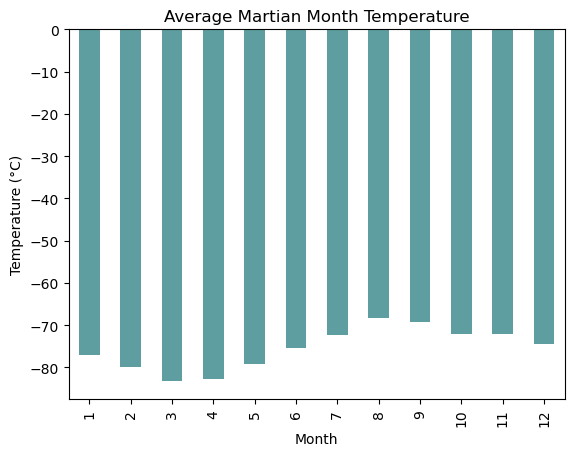

In [15]:
# Plot the average temperature by month
month_avg.plot(kind="bar", color="cadetblue")

# format plot
plt.ylabel("Temperature (°C)")
plt.xlabel("Month")
plt.title("Average Martian Month Temperature")

# save figure
plt.savefig("images/month-avg.png")
plt.show()

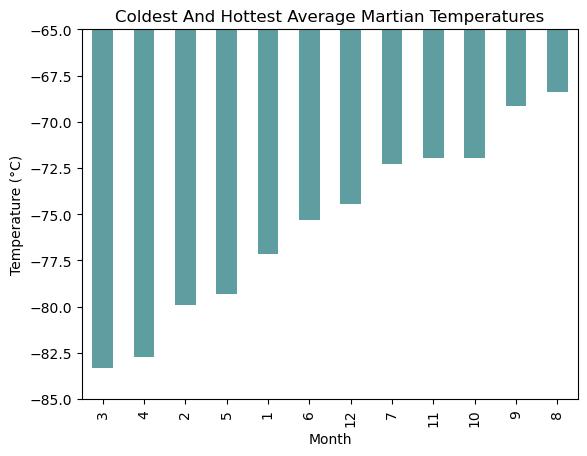

In [16]:
# Identify the coldest and hottest months in Curiosity's location
sorted = month_avg.sort_values()

# plot the coldest and hottest temperatures by month
sorted.plot(kind="bar", color="cadetblue")

# format plot 
plt.ylabel("Temperature (°C)")
plt.xlabel("Month")
plt.title("Coldest And Hottest Martian Temperatures")
plt.ylim(-85, -65)

# save figure
plt.savefig("images/coldest-hottest.png")
plt.show()

In [17]:
# 4. Average pressure by Martian month
month_pressure = df.groupby("month")["pressure"].mean()

# print results
month_pressure.round(2)

month
1     862.49
2     889.46
3     877.32
4     806.33
5     748.56
6     745.05
7     795.11
8     873.83
9     913.31
10    887.31
11    857.01
12    842.16
Name: pressure, dtype: float64

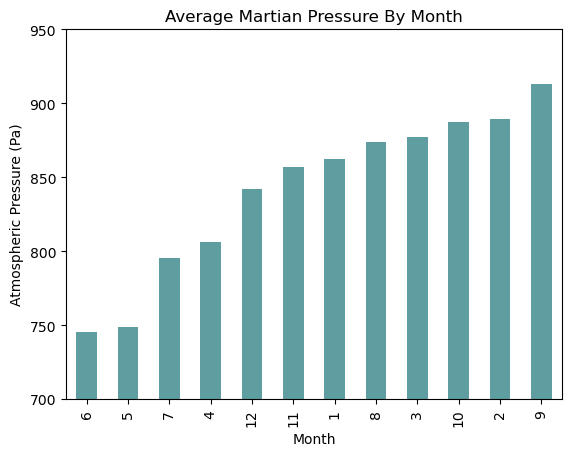

The lowest atmospheric pressure is month 6, the highest is 9


In [18]:
# Plot the average pressure by month
# sort months
month_pressure = month_pressure.sort_values()

# plot the average pressure by month
month_pressure.plot(kind="bar", color="cadetblue")

# format plot
plt.ylabel("Atmospheric Pressure (Pa)")
plt.xlabel("Month")
plt.title("Average Martian Pressure By Month")
plt.ylim(700, 950)

# save figure
plt.savefig("images/pressure.png")
plt.show()

# print results
print(
    f"The lowest atmospheric pressure is month {month_pressure.index[0]}, the highest is {month_pressure.index[-1]}"
)

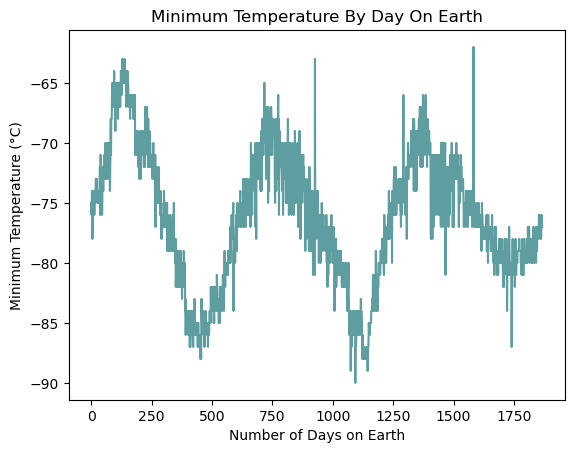

The distance from peak to peak is around 1425-750, or 675 days


In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.plot(df.index, df["min_temp"], color="cadetblue")

# format plot
plt.xlabel("Number of Days on Earth")
plt.ylabel("Minimum Temperature (°C)")
plt.title("Minimum Temperature By Day On Earth")

# save figure
plt.savefig("images/min-temp.png")
plt.show()

print('The distance from peak to peak is around 1425-750, or 675 days')

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [20]:
# Write the data to a CSV
df.to_csv("martian-weather.csv", index=False)

In [21]:
browser.quit()